# Solution for Homework 5

## Problem 1 (4 points) 

The code below generates a random sample from a Poisson distribution. Run the cell to create sample X. 

In [1]:
import numpy as np
from scipy import stats

np.random.seed(13)
X = stats.poisson(7).rvs(925)

Write code to produce a 95\% bootstrap confidence interval for the mean of that sample. Report your result as a print statement with two after-decimal digit accuracy. Describe your procedure (in English in the Markdown box below) and justify all the choices you make in your code. 

In [2]:
N = 10000                                       # number of bootstrap samples
idx = np.random.randint(0, X.size, (N, X.size)) # create bootstrap re-samples
means = X[idx].mean(axis=1)                     # compute sample mean for each bootstrap sample
confint = np.percentile(means, [2.5, 97.5])     # find percentiles of sample means 
print(confint)

[6.84216216 7.18489189]


Create N random bootstrap samples (925 observations chosen at random and with replacement from the original vector X). The size of the bootstrap samples (n=925 is the same as the size of the original sample. 
Find the same mean of each bootstrap sample. Then, find the 2.5$^{th}$ and 95$^{th}$ percentiles, respectively of the distribution of sample means. Repeat this analysis a couple of times to observe how much results change. If they still change (in two after-decimal digit accuracy) increase the value of N until they stabilize. 

For N=10,000 and up the results seem to stabilize around bootstrap confidence interval [6.84, 7.19].

## Problem 2

Conway's [game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a cellular automaton. There aren't any actual players in this "game". Instead the game board evolves according to some specific rules. In this problem, we will simlulate a game board for the game-of-life and study its evolution. 

Consider a two-dimensional $m \times n$ grid (think two-dimensional NumPy array). Each entry in the array is either 1 (represents a "live" cell) or 0 (represents a dead cell). Time is discrete. That is, we consider time points $t_1, t_2 \ldots$. 

Here are the rules for evolution from some time point $t_n$ to the next $t_{n+1}$:

- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

Please note, that changes are only implemented in the next time-step. That means for each cell in the array, we will apply the above rules to decide whether it will live or die and then implement the changed board for the next time step after evaluating all cells. We will assume that the board has a torus structure. That means cells in the upper-most row are assumed to neighbor the cells in the lower-most row and similarly, the cells in the left-most column are assumed to neighbor the cells in the right-most column.

**Example**: each cell on the board has eight neighbors. The four cells to the top, bottom, left, and right as well as the four diagonally bordering cells. In the $5 \times 5$ example shown below, the eight neighbors of the black cell at (0,0) are shown in red. Execute the code below to see the image. 

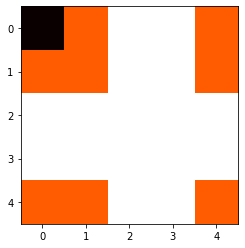

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a = 2*np.ones((5, 5), int) # make numpy array with data
a[0,0] = 0                 # black cell
a[0,1] = a[1,0] = a[1,1] = a[4,4] = a[4,0] = a[4,1] = a[0,4] = a[1,4] = 1 # red cells
plt.imshow(a, cmap='hot');            # create heatmap 0 is black, 1 is red, 2 is white
                                      # don't worry - you don't have to understand the plot commands, yet. 

(a) (2 points) Write a function called `valid_board()` that determines whether a $m\times n$ numpy array is a valid game-of-life board. That means that your function should return the boolean value `True` if every entry is either 0 or 1 and otherwise should return `False`. 

In [4]:
def valid_board(array):
    """checks whether NumPy array is valid game board for game-of-life"""
    return bool(np.array([row.prod() for row in (array==0)|(array==1)]).prod()) 
    # create boolean for each entry which is true if the entry is eitehr 0 or 1. 
    # Aggregate booleans by multiplying them acriss entire array. Return True if that product is 1. 

(b) (6 points) Write a function called `evolution()` that takes as its input a two-dimendional Numpy array. Check, whether the array is a valid game-of-life board. If it is, return the board at the next evolution time step (that is apply the above rules to every cell and return a game board with live or dead cells one time step later). If the board is not valid, return the print statement "your board is not valid". 

Don't forget to comment your code!

In [5]:
def evolution(array):
    """evolves game board for game-of-life for one time-step"""
    if valid_board(array):
        a = array
        m,n = a.shape # find shape (rows, columns) of input array
                      # we're making a new array with two more rows and two more 
                      # columns by replicating the "border" rows/columns on the respective other sides.   
                
        b = (-1)*np.ones((m,n)) # make new array for the next time step (currently filled with negative ones)
        
        left = a[:,0] # replicate left-most and right-most column
        right = a[:,n-1]

        new_a = np.concatenate((right[:, np.newaxis],a, left[:,np.newaxis]), axis = 1) # glue on right,left
        
        top = new_a[0,:] # replicate top and bottom row (already includes "corners") 
        bottom = new_a[m-1,:]
        
        new_a = np.concatenate((bottom[np.newaxis,:],new_a, top[np.newaxis,:]), axis = 0) # glue on top, bottom
        
        for r in range(1,m+1):
            for c in range(1,n+1): # go through each cell in original array 
                
                cell = new_a[r,c]  # value of the cell itself
                neighbors = new_a[r-1:r+2, c-1:c+2] # neighbor arrays (inlcudes cell itself at the center)

                if cell == 1:  # for live cells
                    if np.sum(neighbors)-cell <2: # if there are fewer than 2 live neighbors, kill the cell
                        b[r-1,c-1] = 0
                    elif np.sum(neighbors)-cell >3: # if there are more than 3 live neighbors, kill the cell
                        b[r-1,c-1] = 0
                    else:                        # if there are 2 or 3 live neighbors, cell stays alive
                        b[r-1,c-1] = 1
                    
                if cell == 0:  # for dead cells
                    if np.sum(neighbors) ==3: # if there are exactly three live neighbors, cell comes alive
                        b[r-1,c-1] = 1
                    else:                  # otherwise it stays dead
                        b[r-1,c-1] = 0
                        
        return b
        
    else:
        return print("your board is not valid")

**Optional:** If you are not able to implement the `evolution()` function above, provide a written description of your algorithm here instead for potential partial credit. 

Algorithm description:
- Make a larger board (to be able to get neighboring cells for each cell by slicing that larger board)
    * Repeat the first, and last columns 
    * Repeat the first and last rows
    * larger board will have 2 more rows and 2 more columns than original board. 
- For each cell in the original board
    * identify neighboring cells
    * implement game rules depending on whether the cell itself is alive or dead and the number of live neighbors. 
    * create updated game-board and populate the board with the new status (live/dead) of the cell
- return print statement if board is invalid, otherwise return new (updated) board.

**Remark:** The function `print_board()` defined below takes a $m \times n$ NumPy array as its input and returns a printed image of the live (black) and dead (white) cells. Execute the code below to define the function. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def print_board(array):
    """visualizes game board for game of life"""
    plt.imshow(array, cmap = 'binary');

(c) (1 point) Take the Numpy array `s` defined and visualized below. Apply your evolution function to it and visualize the board (using the `print_board()` function defined above) after three evolution time steps. That is, if the image in the given cell below represents time $t_n$, then show me the image corresponding to $t_{n+3}$.  

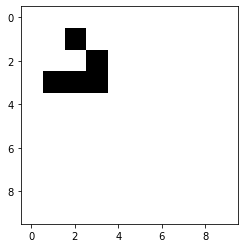

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

s = np.zeros((10,10),int)
s[1,2] = s[2,3] = s[3,1] = s[3,2] = s[3,3] = 1 # making a specific shape in a 10 by 10 grid. 

print_board(s)

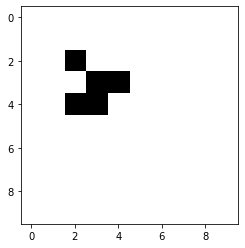

In [8]:
for i in range(3):
    s = evolution(s) # evolving the shape over three time steps. 
    
print_board(s)

(d) (1 point) What happens to the shape if you take the original array `s` from (c) above and increase the number of evolution time steps? Please describe what you see - you don't have to show your code, just explain in English what happens.

The shape "morphs" and changes shape. It will eventually return to its original shape but in a different position. Over time, the shape moves towards the lower right corner of the board. 

(d) (3 points) Use either NumPy or Scipy to generate a game-of-life board of size $10 \times 10$ in which each cell is a Bernoulli(p) random variable. That is, assume that cells are independent and that each value is 1 with probability p or otherwise 0. Start with p=0.5. Visualize your initial board. Alternatively, visualize the board after 100 steps of evolution. Repeat this process for a number of different random seeds (at least 10 different seeds). You do not have to show us your plots (you can only show one plot at a time per Juypter Notebook cell with the `print_board()` function). What happens if you start with a different (larger, smaller) value of p? Please describe what you observe. 

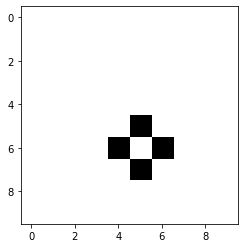

In [9]:
p = 0.5

np.random.seed(10)
gol = np.random.binomial(1,p,(10,10))    
#print_board(gol) # visualize original random board

for i in range(100):
    gol = evolution(gol)
        
print_board(gol) #visualize board after 100 steps
        

For p=0.5, the board is sometimes empty after 100 time steps (all cells dead). But sometimes, certain shapes remain. Those shapes are always the same: often rectangles or certain other shapes (you can see a list of these "permanent" still-life shapes on the [wikipedia site](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life). For large (p=0.9) or small (p=0.1) start probabilities, the board is much more likely to be empty after 100 steps. 

## Problem 3 ( 3 points) 

Write a function called "local_peak" that takes as its input a one-dimensional Pandas series and returns a list of the positions of all local "peaks". That is, your function should return a list of the position values of all numbers in the series have have smaller values on both sides of them. 

Example: For ```pd.Series([1,3,2,4,4,5,7,4,5])``` your function should return ```[1,6]```.
For ```pd.Series([1,2,3,3,3,2])``` your function should return ```[]``` (since there is no local peak in this series, but rather a "plateau".)

In [10]:
import pandas as pd
import numpy as np

def local_peak(X):
    """Finds position of local peaks in Pandas Series"""
    argmax_list = []
    for i in range(1,len(X)-1):
        if (X[i-1]<X[i]) & (X[i]>X[i+1]):
            argmax_list.append(i)
    return argmax_list

# check your answer: 
X=pd.Series([1,3,2,4,4,5,7,4,5])
local_peak(X) == [1,6]

True